# Workshop to discover an Exoplanet orbiting Kepler-6!

### To run this coding notebook, you only need to click '**Runtime**' and '**Run all**'.

We will examine in this workshop the brightness from Kepler-6 (known by ID KIC 10874614).
Some facts about Kepler 6:
*   located in the constellation Cygnus
*   almost 2,000 light-years away
*   slightly, larger, more metal-rich, slightly cooler, and more massive than our Sun

Astronomers discover planets orbiting stars by examining their brightness ove time. We will be looking for periodic 'dips' in their brightness, which are actually *planets* orbiting it! Because these planets are outside of our own solar system, we call them *exoplanets*.

### Today, we are all **exoplanet hunters** and will be discovering the explanet Kepler-6b!

Some facts about Kepler-6b:
*   Kepler-6b is 2/3 the size of our planet Jupiter
*   Kepler-6b orbits at 1% of the distance that Jupiter does
*   Kepler-6b orbits even closer to the Sun than Mercury, the closest planet to the Sun in our solar system!
*   Kepler-6b was the *third exoplanet* discovered by the Kepler mission!
*   Kepler-6b was discovered by the Kepler Space Telescope in 2009

The code is inspired from this [tutorial](https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-recover-a-known-planet.html).

To read up on Kepler-6 and it's planet Kepler-6b, see this [link](https://en.wikipedia.org/wiki/Kepler-6).

## This code block runs the code we need to examine the star and its brightness

It loads python packages we need to run the code and loads the data for Kepler-6.

#### **Click the arrow button below to run this code!**

In [32]:
# Import necessary packages
import pandas as pandas
import numpy as numpy
import matplotlib.pyplot as plot
import lightkurve as lightkurve
import warnings

# Remove warnings from code
warnings.filterwarnings('ignore')

In [33]:
# Load target pixel file
star_image = lightkurve.search_targetpixelfile("Kepler-6", author="Kepler", quarter=3, cadence="long").download()

# Load the lightcurve from the target pixel file
raw_lightcurve = star_image.to_lightcurve(aperture_mask=star_image.pipeline_mask)

## The following code will show us a picture of the star and its light over time

We'll start by looking at an image of Kepler-6.
This picture is pixelated because it is very zoomed in.

Try changing the **colormap** variable to something else, then **click the arrow** to see what changes!

You can also adjust the frames values to see the star at different times.

### Do you see any changes in the brightness of the star over time?

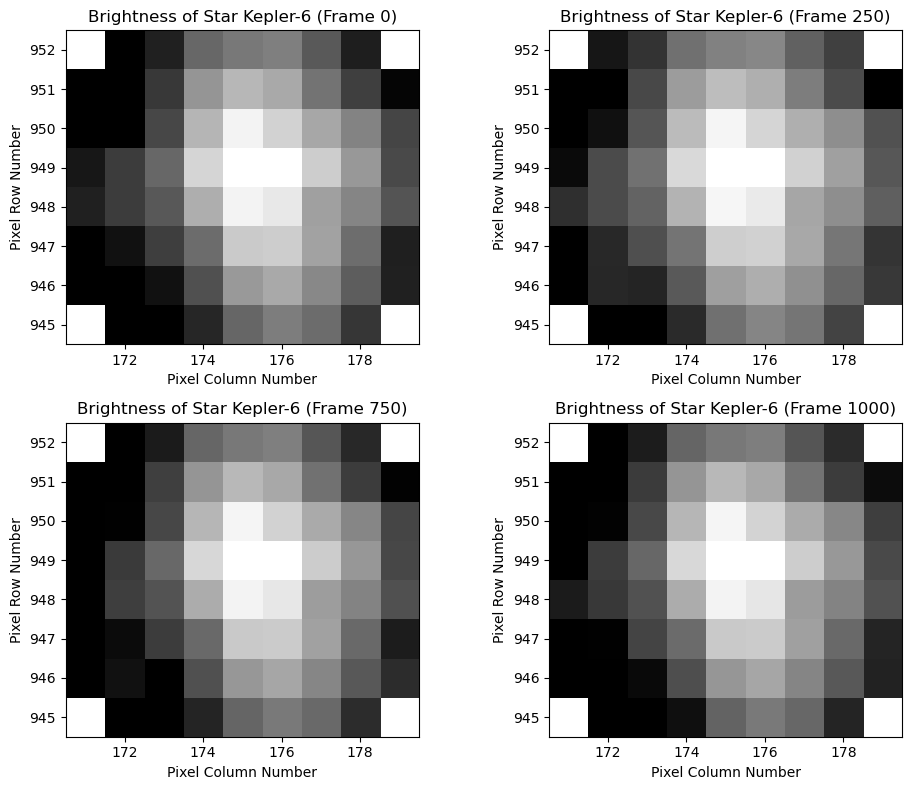

In [34]:
colormap = 'gray' # Try changing this to 'viridis', 'rainbow', or 'inferno'
frames = [0, 250, 750, 1000]  # Try changing these numbers to see how the star changes over time

# Plot the image of Kepler-6 for 4 frames
fig, axs = plot.subplots(2, 2, figsize=(10, 8))

for i, frame in enumerate(frames):
    row = i // 2
    col = i % 2
    ax = axs[row, col]

    star_image.plot(frame=frame, scale='log', cmap=colormap, show_colorbar=False, ax=ax)
    ax.set_title(f"Brightness of Star Kepler-6 (Frame {frame})")

plot.tight_layout()
plot.show()

Now that we've seen the star, we are going to look at its brightness over time.

This is tracked by the Kepler telescope taking a picture of the star, as above, multiple times each day over a long period of time (like a year).

Brightness over time of a star is called it's **lightcurve**.

### What do you notice about the lightcurve of Kepler-6?

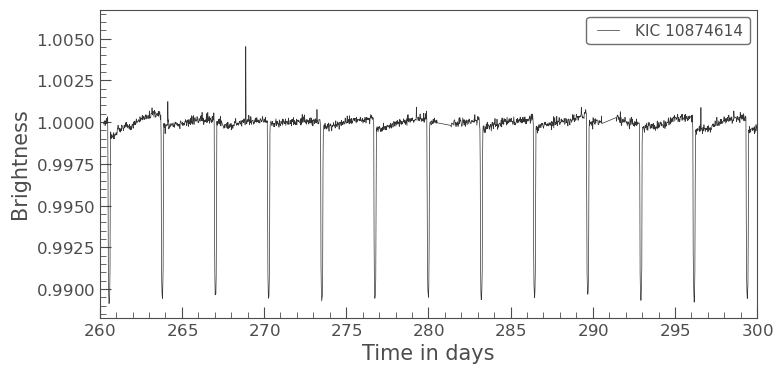

In [35]:
# Remove long-term variabilities that are muddying the lightcurve
lightcurve, trendline = raw_lightcurve.flatten(window_length=600, return_trend=True)

# Plot the lightcurve of Kepler-6
lightcurve_plot = lightcurve.plot()
lightcurve_plot.set_xlim(260, 300)
lightcurve_plot.set_ylabel("Brightness")
lightcurve_plot.set_xlabel("Time in days")
plot.show()

In groups, try to guess what the periodic dip corresponds to, and what the 'period' of the dip is (or how often the dip occurs, in days)

### **Tell a volunteer your guess on the period and what the dips are before proceeding!!**

Ok- let's check! We're going to use math (called a Fourier transform) to find periodic signals in the data (any consistent dips). The most dominant periodic signals will be the peaks in the graph below- does the largest peak correspond to the period of dips you guessed?

3.234623462346235 d


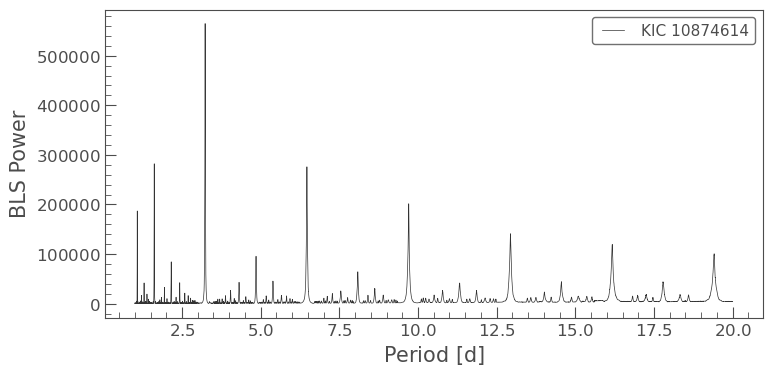

In [36]:
# Create a BLSPeriodogram
periodogram = lightcurve.to_periodogram(method="bls", period=numpy.linspace(1, 20, 10000))
best_fit_period = periodogram.period_at_max_power
print(best_fit_period)

# Plot the periodogram (power spectrum of frequencies in the brightness plot above)
periodogram.plot()
plot.show()

The number above tells us the strongest periodic signal has a period of **3.234 days!** Is that what you guessed was the period of the planet?

Ok- but how can we tell this is truly an exoplanet?


*   We need to make sure the dips *always* happen ever 3.2 days
*   We can do this by 'cutting' the lightcurve at each dip, and layering it over itself
*   If the dips happen with the same distance between them, and they are of the same depth, it's a planet!
*   After checking the period 3.2, check the other peaks in the plot above to try and find more planets!

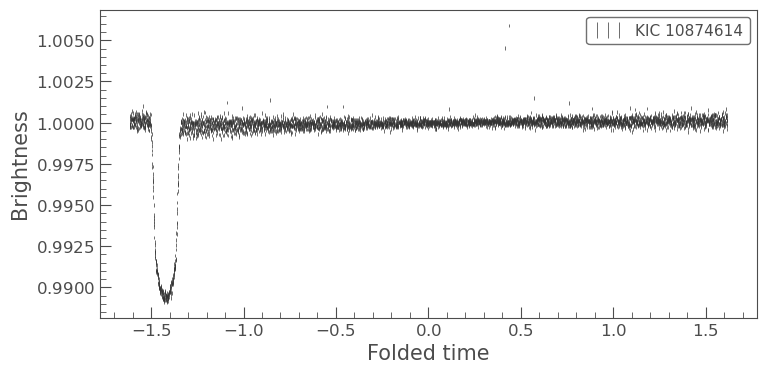

In [37]:
# Plot the layered lightcurve of Kepler-6
period = 3.2346 # Try changing this value to other periods, such as 4.9 or 6.4
lightcurve.fold(period=period, epoch_time=period).errorbar();
plot.ylabel("Brightness")
plot.xlabel("Folded time")
plot.show()

### We did it! That is the consistent dip of a planet, Kepler-6b, orbiting the star Kepler-6 every 3.234 days.

# If you wanted to find more exoplanets, here is the lightcurve of a very famous planetary system: the TRAPPIST-1 system
The TRAPPIST-1 system is only 41 light years away from Earth, and possesses a star much smaller and colder than our Sun. However, it has *7 planets* orbiting it. Each of these planets are much closer to their star than Mercury is to the Sun. Also- all of these planets are *about the same size as Earth!*

You can read more on this system [here](https://en.wikipedia.org/wiki/TRAPPIST-1)

To explore these planets, run the code below and see how we discover the 7 planets using the 'periodigram' plot, which shows spikes at the period of each 'dip' we see in the lightcurve. This data is a lot messier, so planets may be less obvous than in the example above.

Linnea: Maybe update this to [Kepler-69](https://docs.lightkurve.org/tutorials/3-science-examples/exoplanets-identifying-transiting-planet-signals.html)

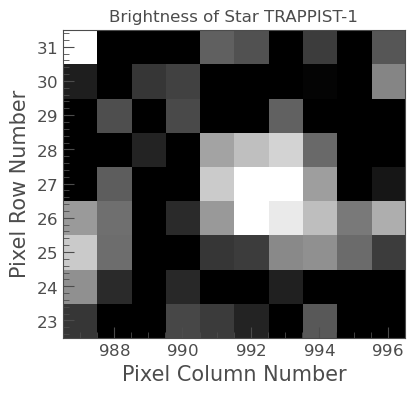

In [38]:
# Load target pixel file
star_image_trappist = lightkurve.search_targetpixelfile("TRAPPIST-1", author="K2").download()

# Plot the image of TRAPPIST-1
star_image_trappist.plot(frame=100, scale='log', cmap='gray', show_colorbar=False)
plot.title("Brightness of Star TRAPPIST-1")
plot.show()

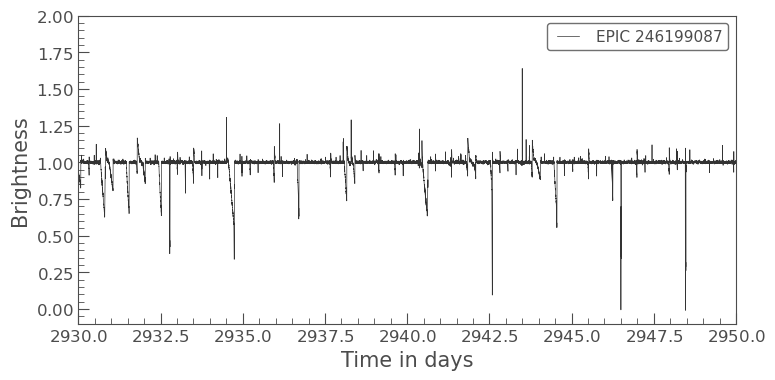

In [39]:
# Load the lightcurve from the target pixel file
raw_lightcurve_trappist = star_image_trappist.to_lightcurve(aperture_mask=star_image_trappist.pipeline_mask)

# Remove long-term variabilities that are muddying the lightcurve
lightcurve_trappist, trendline_trappist = raw_lightcurve_trappist.flatten(window_length=301, return_trend=True)

# Plot the lightcurve of TRAPPIST-1
lightcurve_plot_trappist = lightcurve_trappist.plot()
lightcurve_plot_trappist.set_xlim(2930, 2950)
lightcurve_plot_trappist.set_ylim(-0.1, 2)
lightcurve_plot_trappist.set_ylabel("Brightness")
lightcurve_plot_trappist.set_xlabel("Time in days")
plot.show()

### The star has a less-clean lightcurve, since there are 7 planets orbiting it and blocking its light at once.

Examine the plot generated by the code below to determine the orbital period of each planet in the system. Then, we can 'fold' the lightcurve over that period to detect whether the signal of the planet is consistent and a true planet!

Period with the highest power: 1.96 d


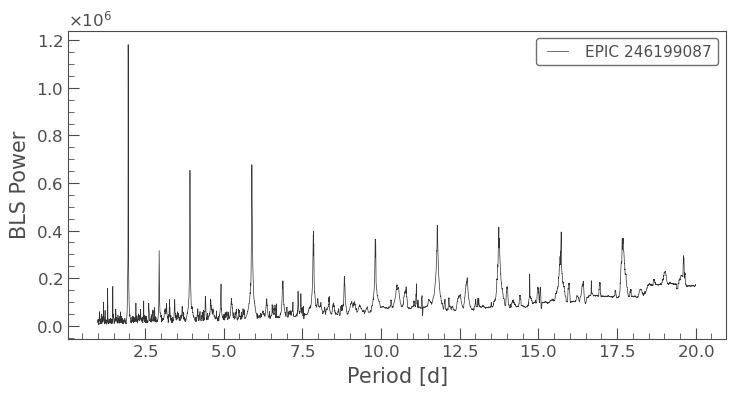

In [40]:
# Create a Periodogram
periodogram_trappist = lightcurve_trappist.to_periodogram(method="bls", period=numpy.linspace(1, 20, 10000))

# Print the periods and transit times for each high-power signal
best_fit_period_trappist = periodogram_trappist.period_at_max_power
print(f'Period with the highest power: {best_fit_period_trappist:.2f}')

# Plot it- uncomment to see the periodiogram (power spectrum of frequencies in the brightness plot above)
periodogram_trappist.plot()
plot.show()

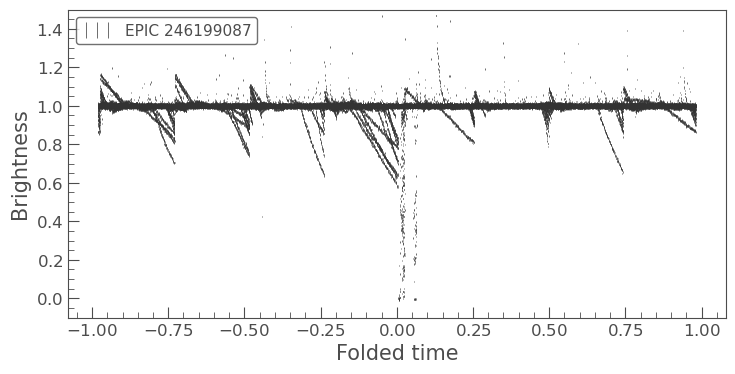

In [41]:
# Plot the layered lightcurve of TRAPPIST-1
period = best_fit_period_trappist # Try changing this to 3.92 to see the folded lightcurve of the second planet
lightcurve_trappist.fold(period=period, epoch_time=periodogram_trappist.transit_time_at_max_power).errorbar();
plot.ylim(-0.1, 1.5)
plot.ylabel("Brightness")
plot.xlabel("Folded time")
plot.show()

It is less obvious, but there is definitely a dip in the lightcurve consistently at a period of almost 2 days. This would be TRAPPIST-1b, a rocky planet about the size of Earth. We can see the presence of other planets in the system are 'muddying' the signal of TRAPPIST-1b.